**Description and Purpose of the Problem**

* The problem is to predict the survival status (Alive/Dead) of breast cancer patients.
* The main algorithm used is the Random Forest Classifier to build the classification model.

**Model Evaluation through Performance Metrics:**

* Accuracy.
* Recall.
* F1 Score.
* Confusion Matrix.

**Purpose:**

* Accurate Classification: Determine whether the tumor is likely to be cancerous, supporting doctors in diagnosis.
* Model Optimization: Understand the characteristics of the data (through charts, heatmaps) and build an effective model to provide reliable results.
* Data Analysis: Through visualization and statistics, explore the correlation between features in the dataset.

**Limitations of the Study:**

* Limited accuracy.
* Incomplete data.
* Model complexity: The Gradient Boosting model can easily overfit when there are too many irrelevant features in the data if there is no proper parameter tuning strategy.

**Scalability and Improvement:**

* Model Tuning: Model performance can be improved by adjusting * RandomForest parameters such as the number of trees (n_estimators), the maximum depth of the trees (max_depth), and other parameters like min_samples_split, min_samples_leaf to optimize tree splits.
* Data Balancing Techniques: If the data is imbalanced, techniques like SMOTE (Synthetic Minority Over-sampling Technique) can be used to generate additional data for the minority class.

**Comparison with Other Studies:**

Some studies have shown that models like Gradient Boosting and XGBoost may perform better than RandomForest in classification tasks, especially with large or complex datasets. However, RandomForest has the advantage of being easy to deploy and less prone to overfitting when enough data is available.

Import the necessary libraries to build the RandomForest model

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import jaccard_score
%matplotlib inline


Read data from CSV file

In [2]:
df=pd.DataFrame(pd.read_csv('/content/Breast_Cancer.csv'))
df

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,62,Other,Married,T1,N1,IIA,Moderately differentiated,2,Regional,9,Positive,Positive,1,1,49,Alive
4020,56,White,Divorced,T2,N2,IIIA,Moderately differentiated,2,Regional,46,Positive,Positive,14,8,69,Alive
4021,68,White,Married,T2,N1,IIB,Moderately differentiated,2,Regional,22,Positive,Negative,11,3,69,Alive
4022,58,Black,Divorced,T2,N1,IIB,Moderately differentiated,2,Regional,44,Positive,Positive,11,1,72,Alive


Check out the basics of DataFrame

In [3]:

def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check

In [4]:
check(df)

,column,dtypes,nunique,sum_null
0,Age,int64,40,0
1,Race,object,3,0
2,Marital Status,object,5,0
3,T Stage,object,4,0
4,N Stage,object,3,0
5,6th Stage,object,5,0
6,differentiate,object,4,0
7,Grade,object,4,0
8,A Stage,object,2,0
9,Tumor Size,int64,110,0


Plot a countplot for each column (except the 'Status' column)

In [5]:
def countplot (df,var):
    sns.countplot(data=df,x=var,hue='Status')
    sns.set(rc={'figure.figsize':(20,15)})
    plt.xticks(rotation=90)
    plt.show()

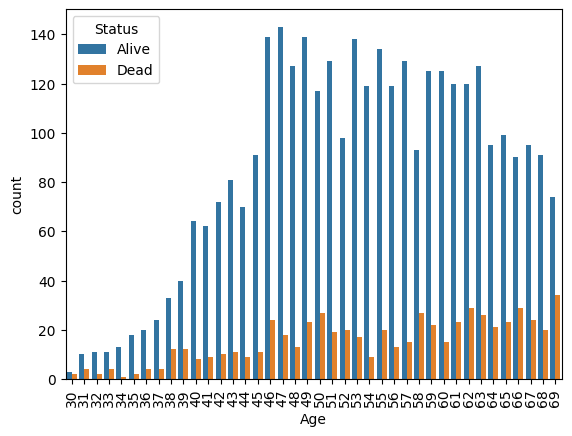

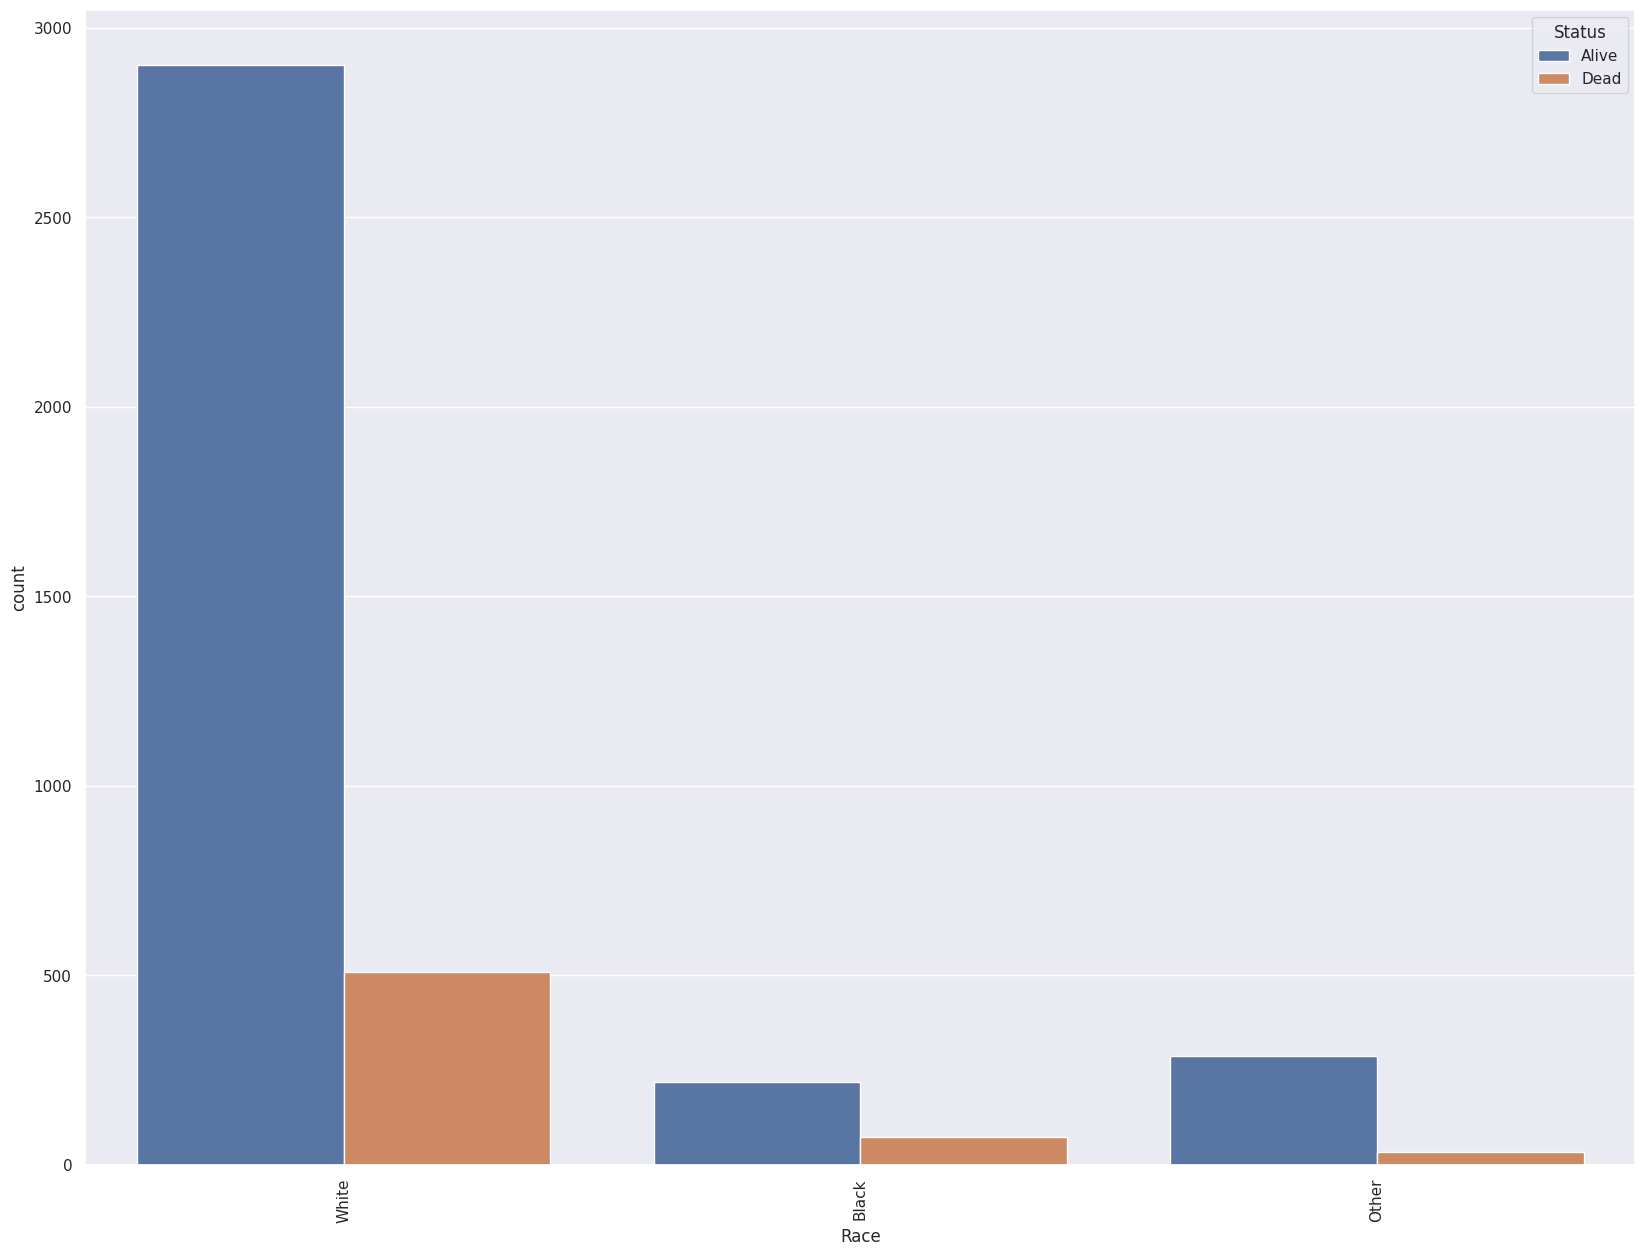

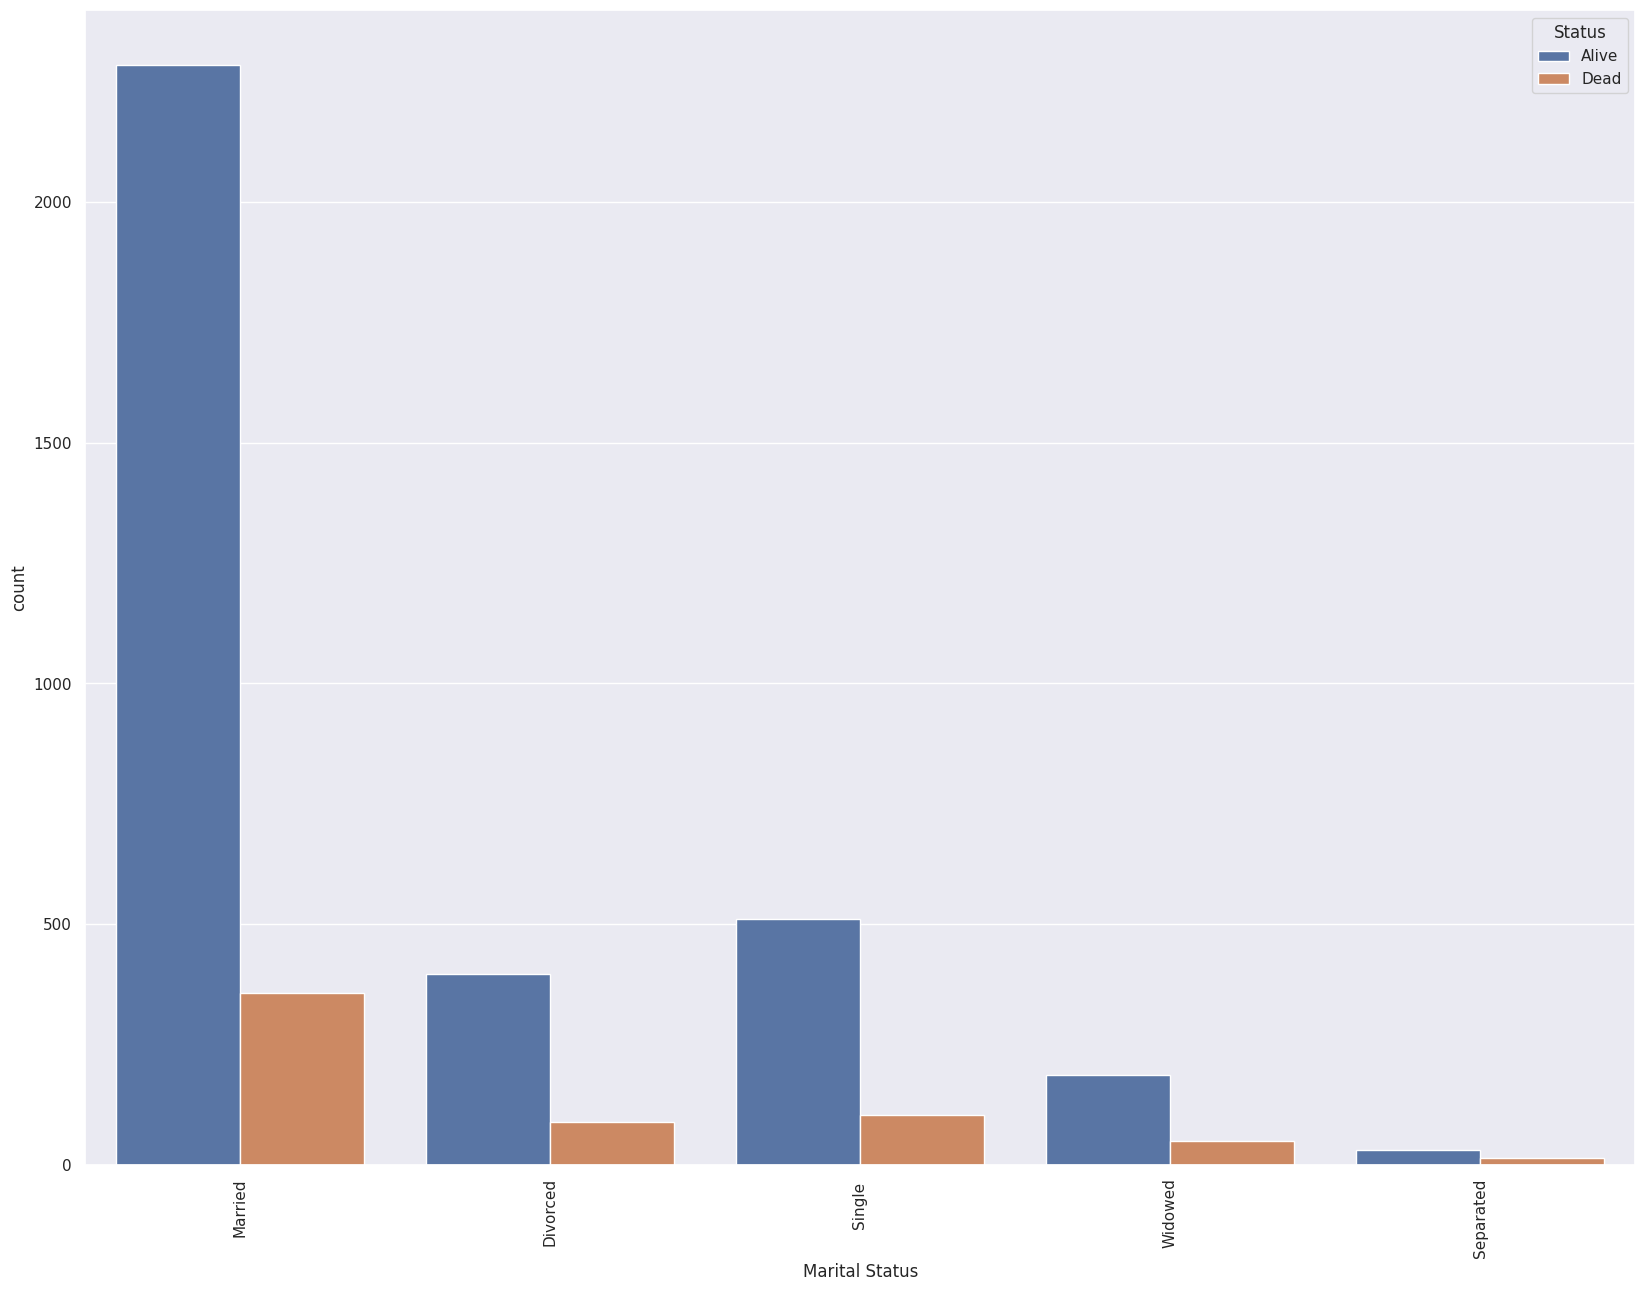

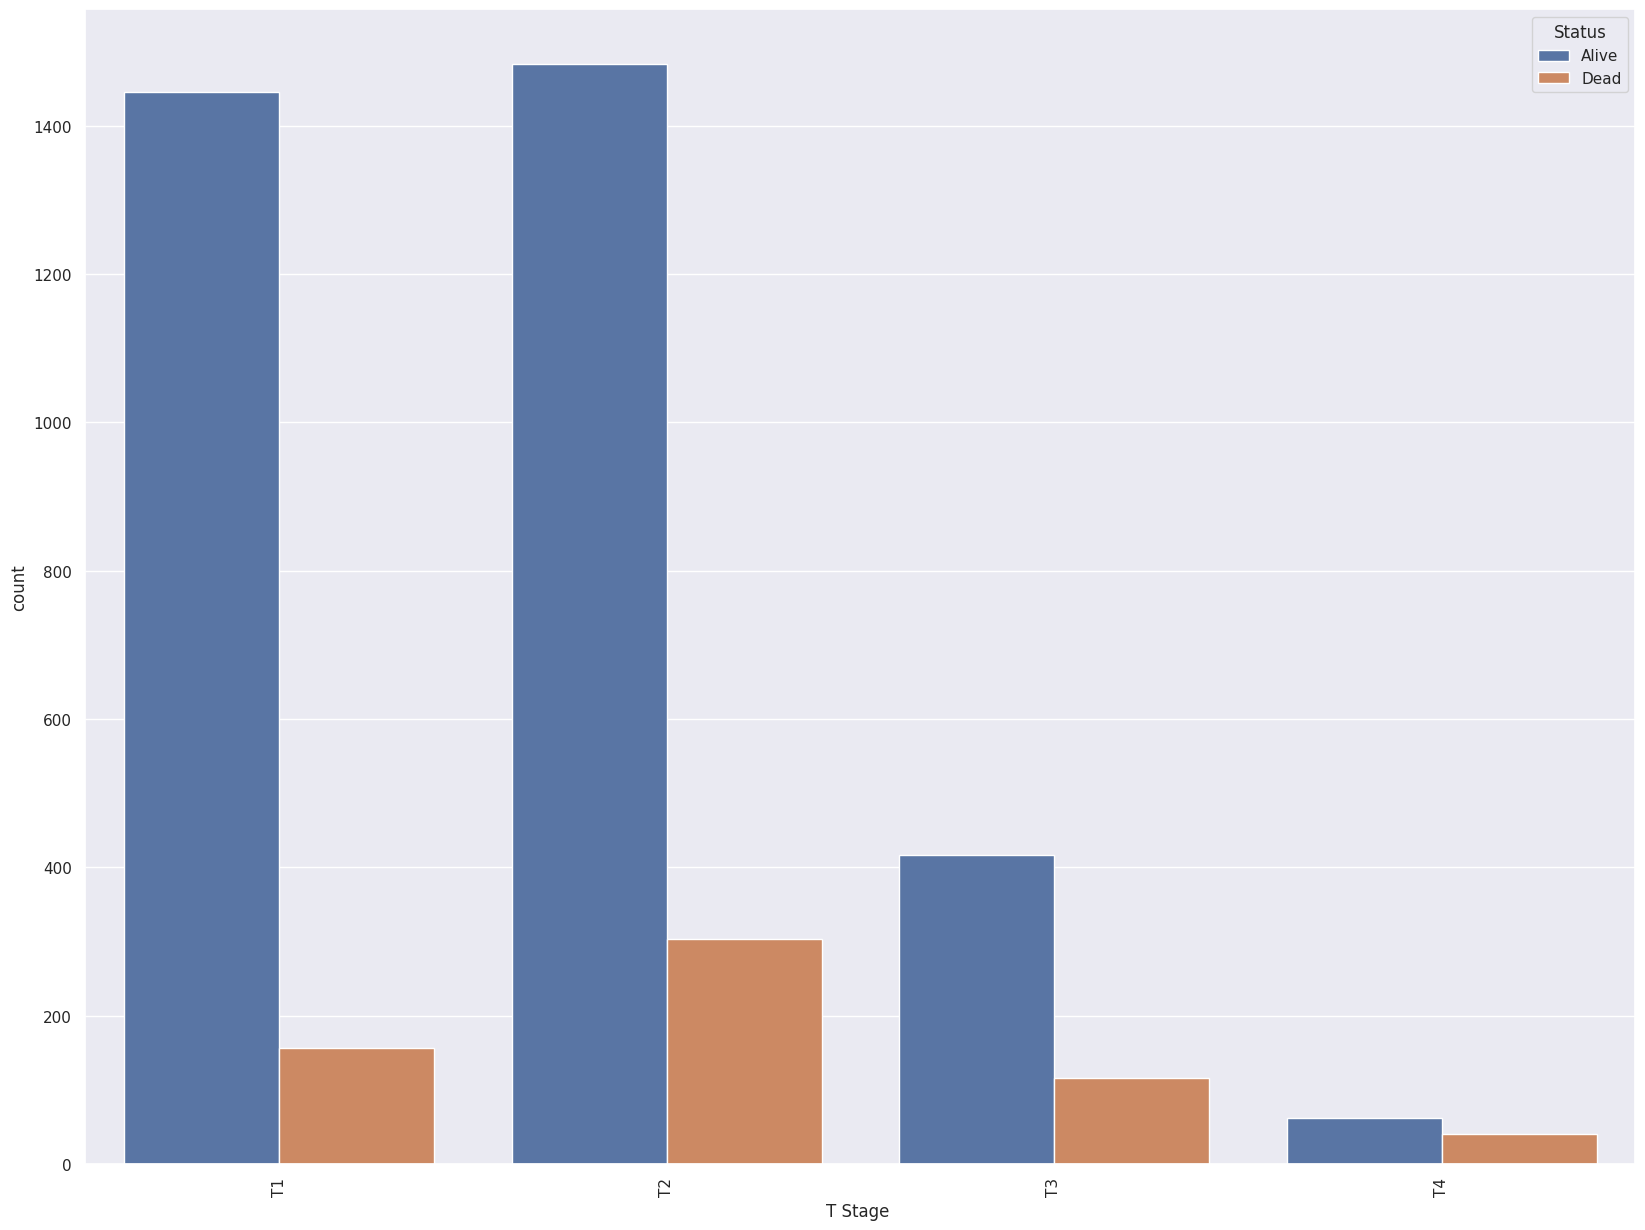

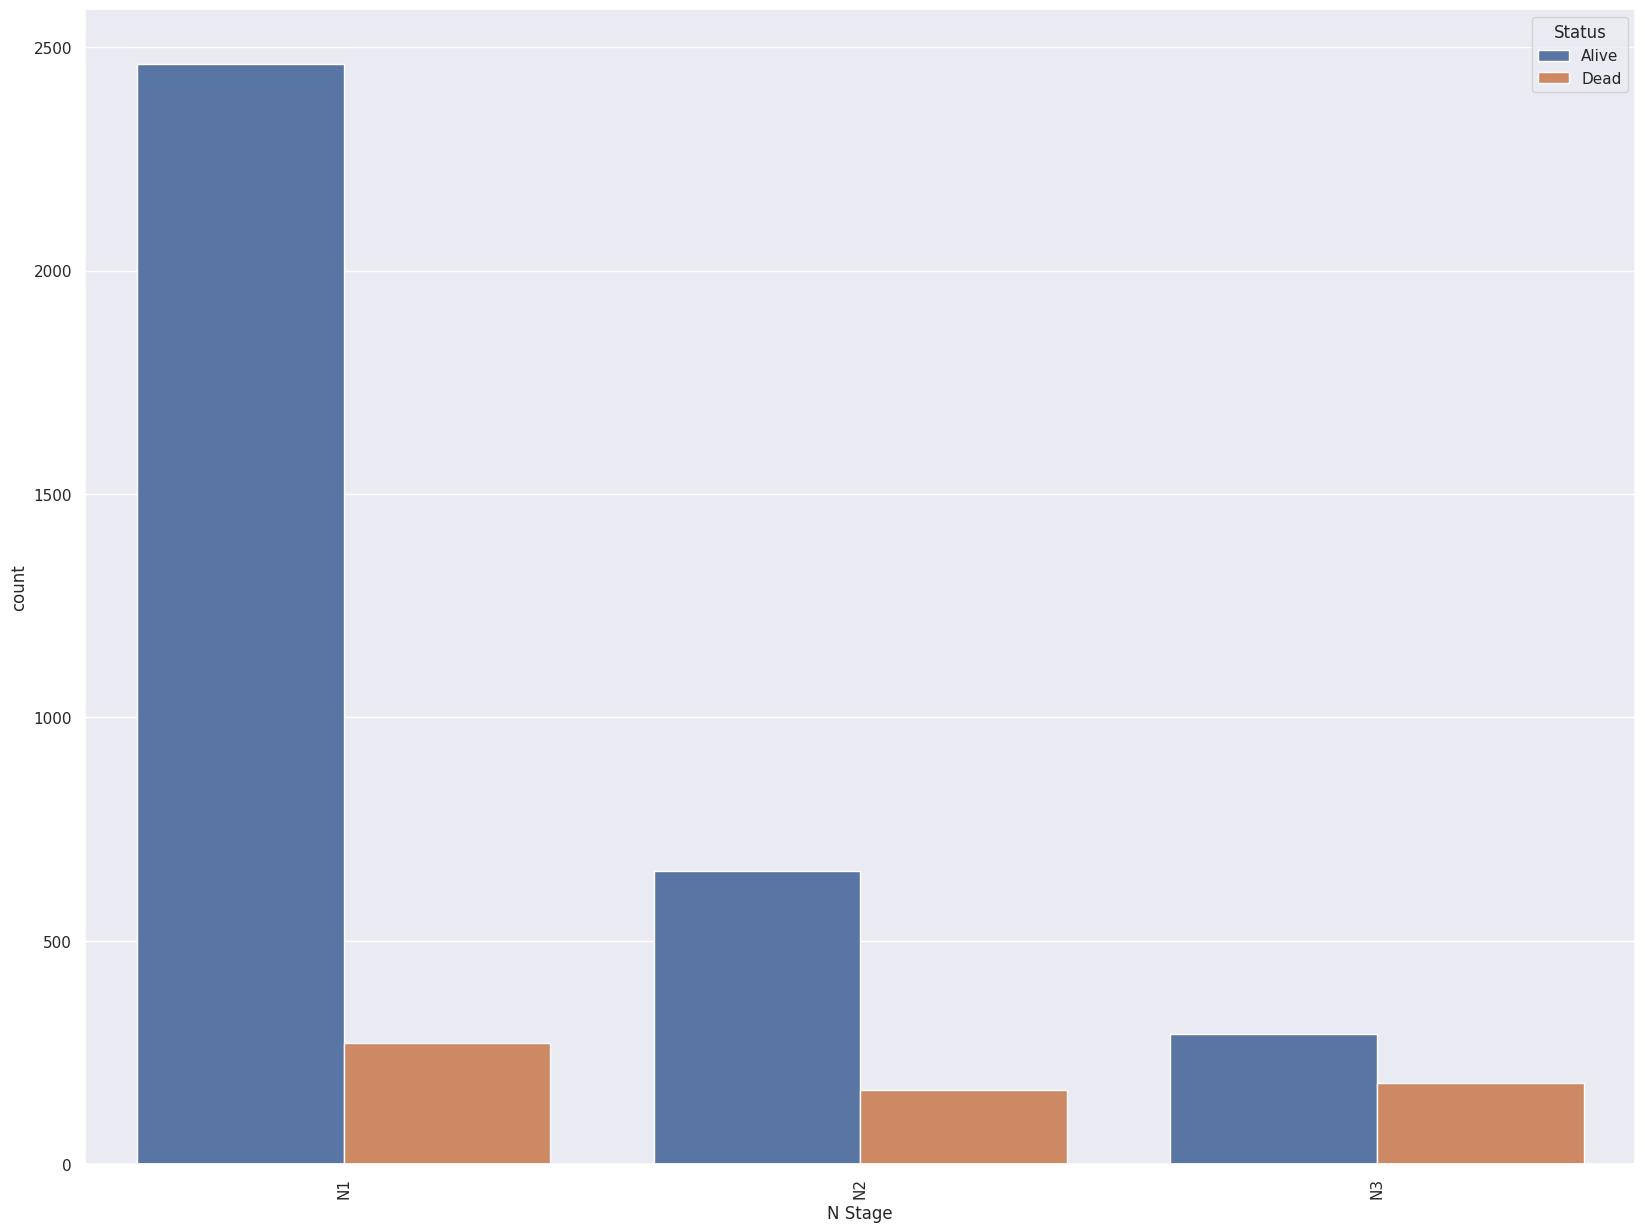

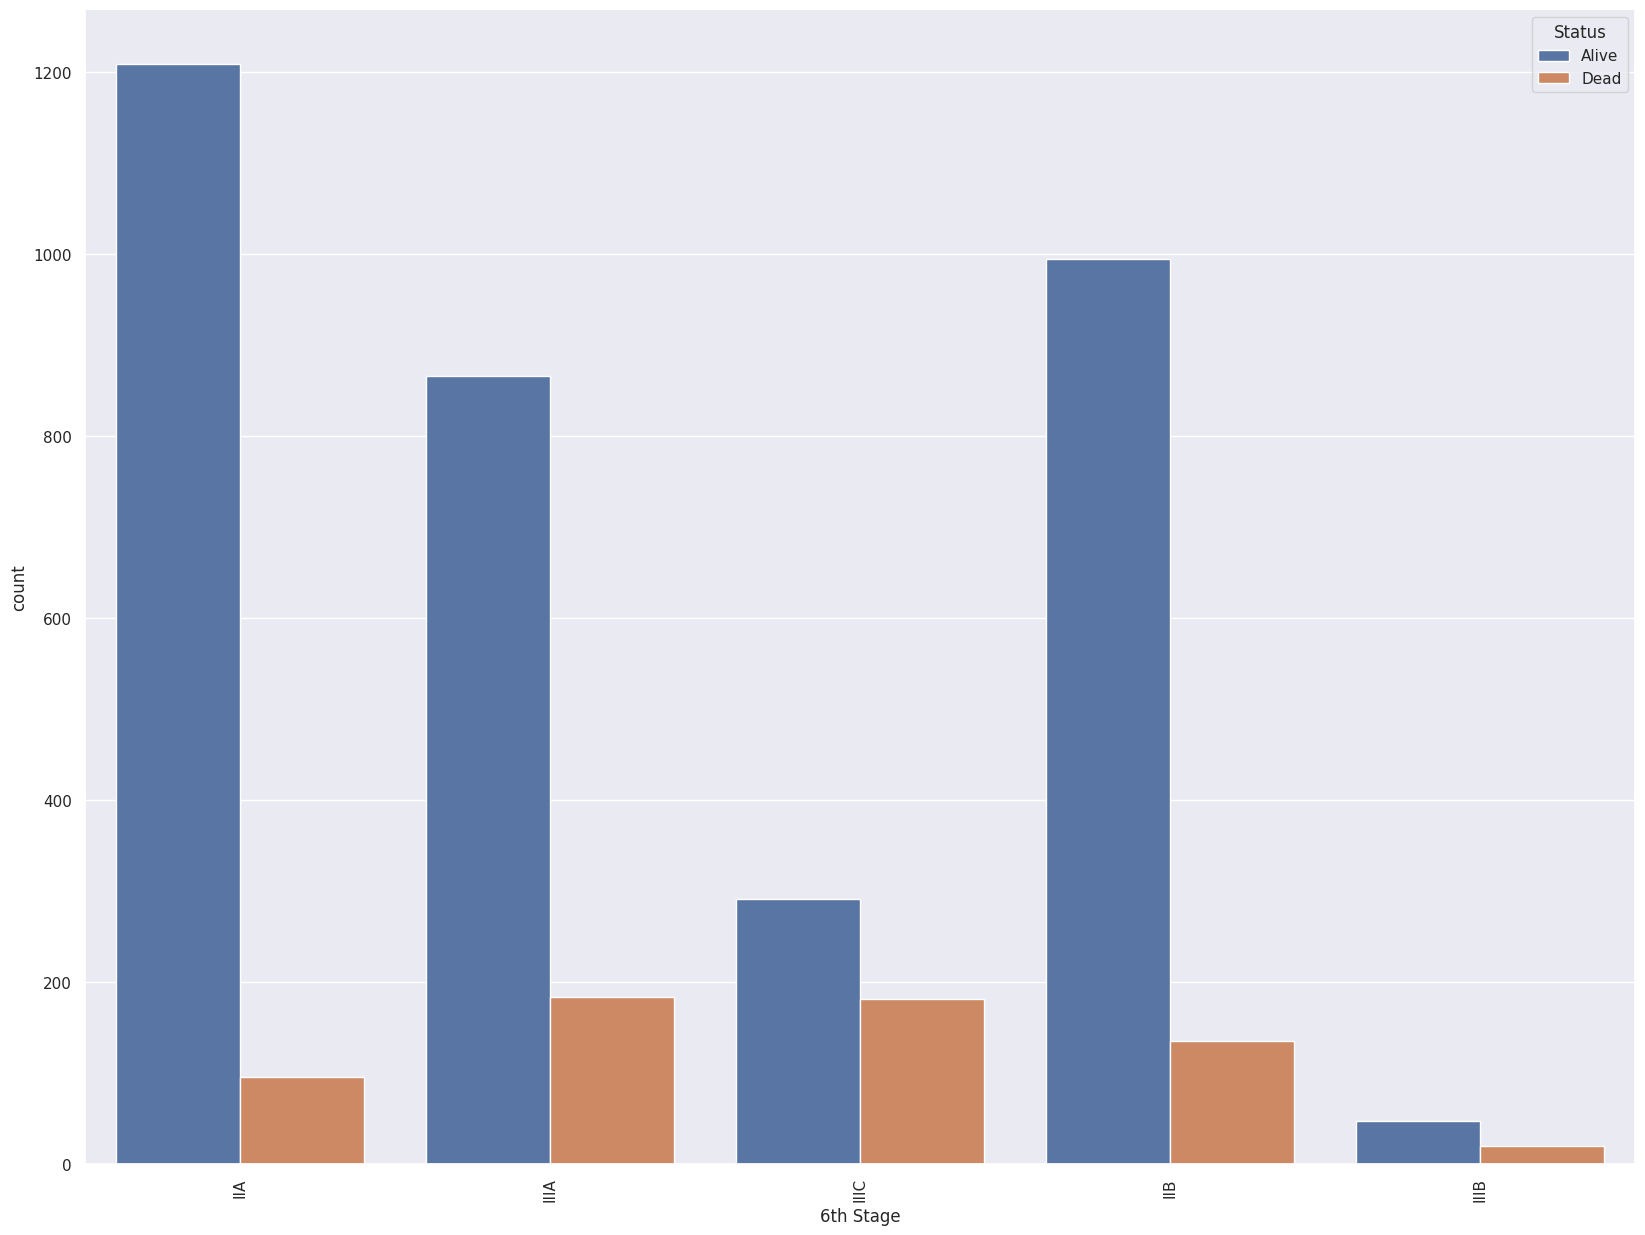

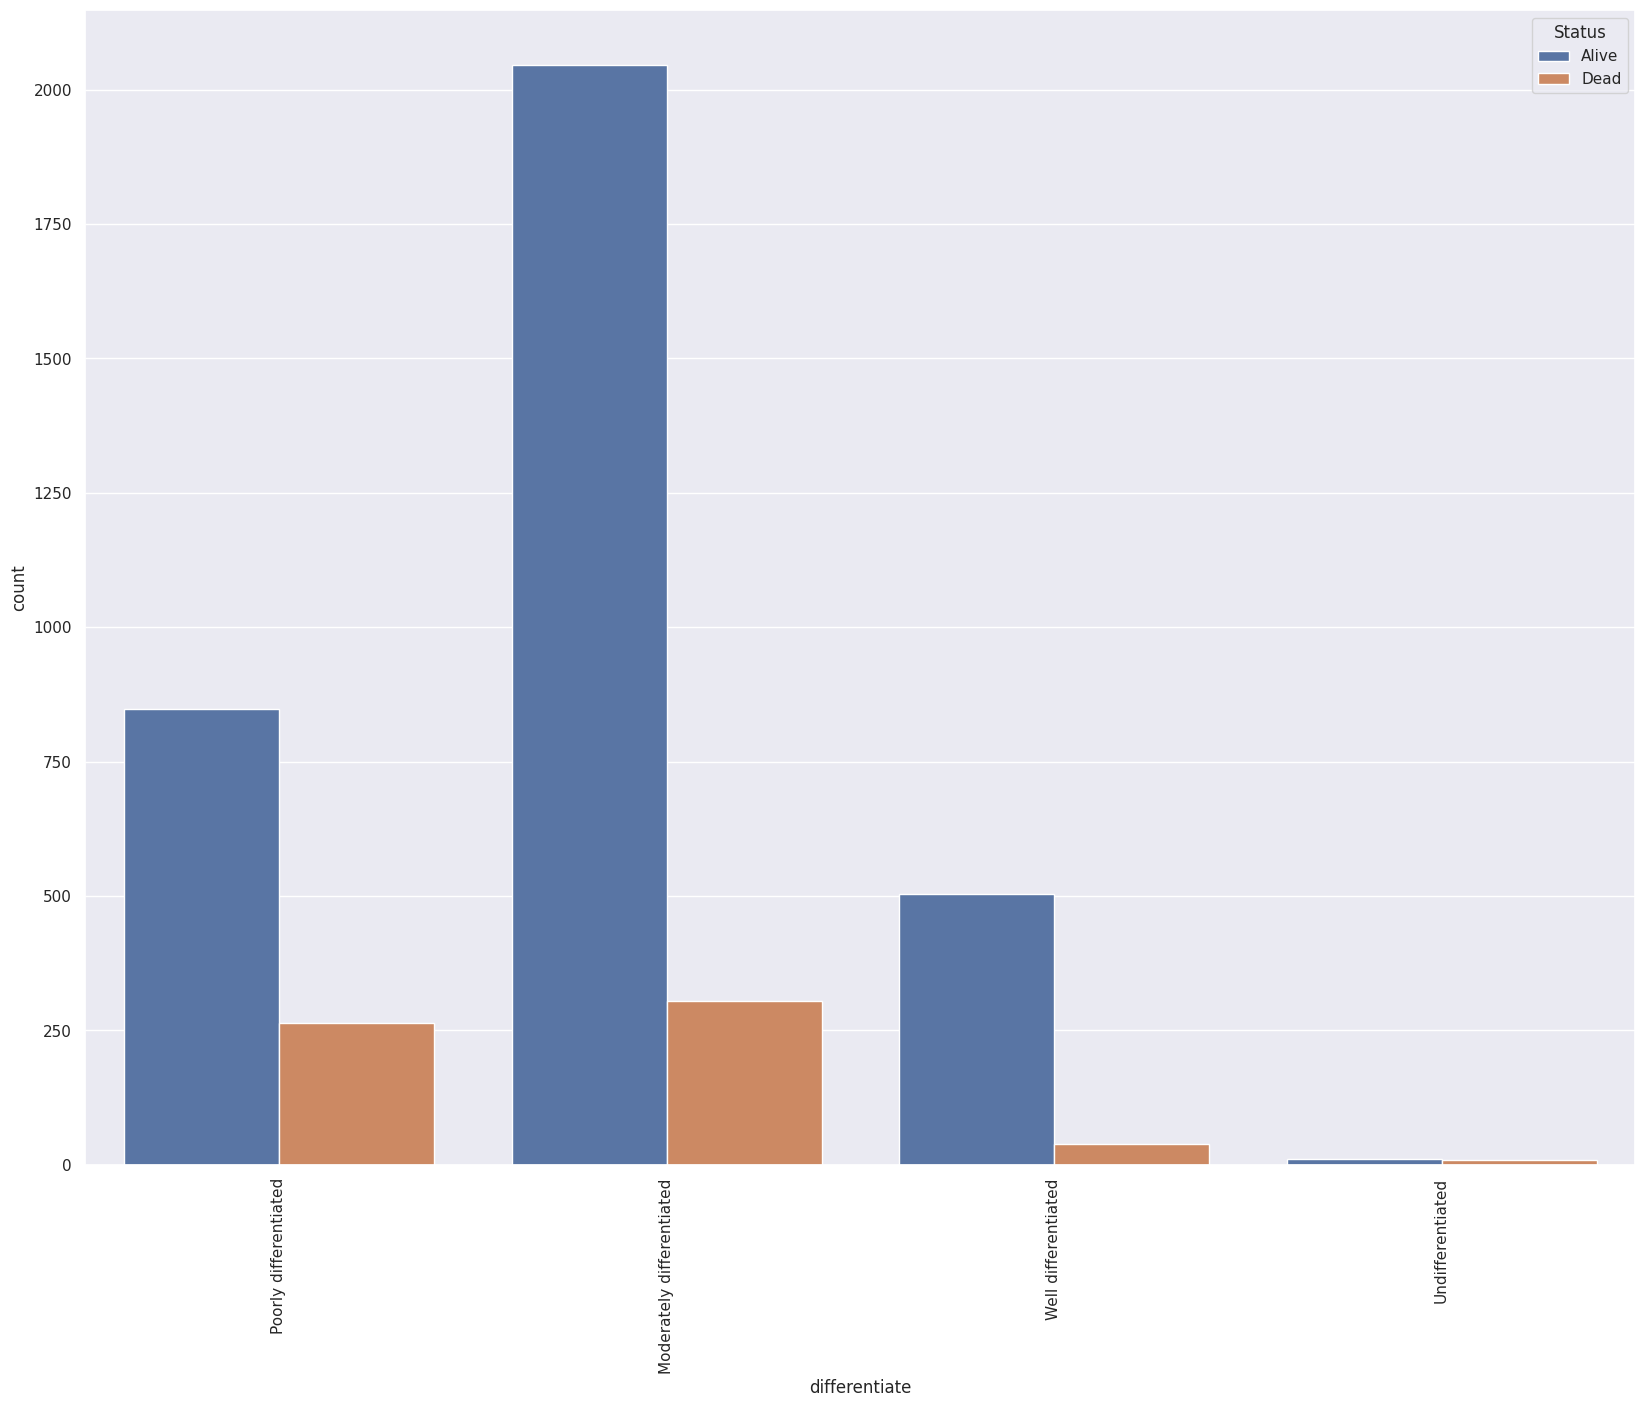

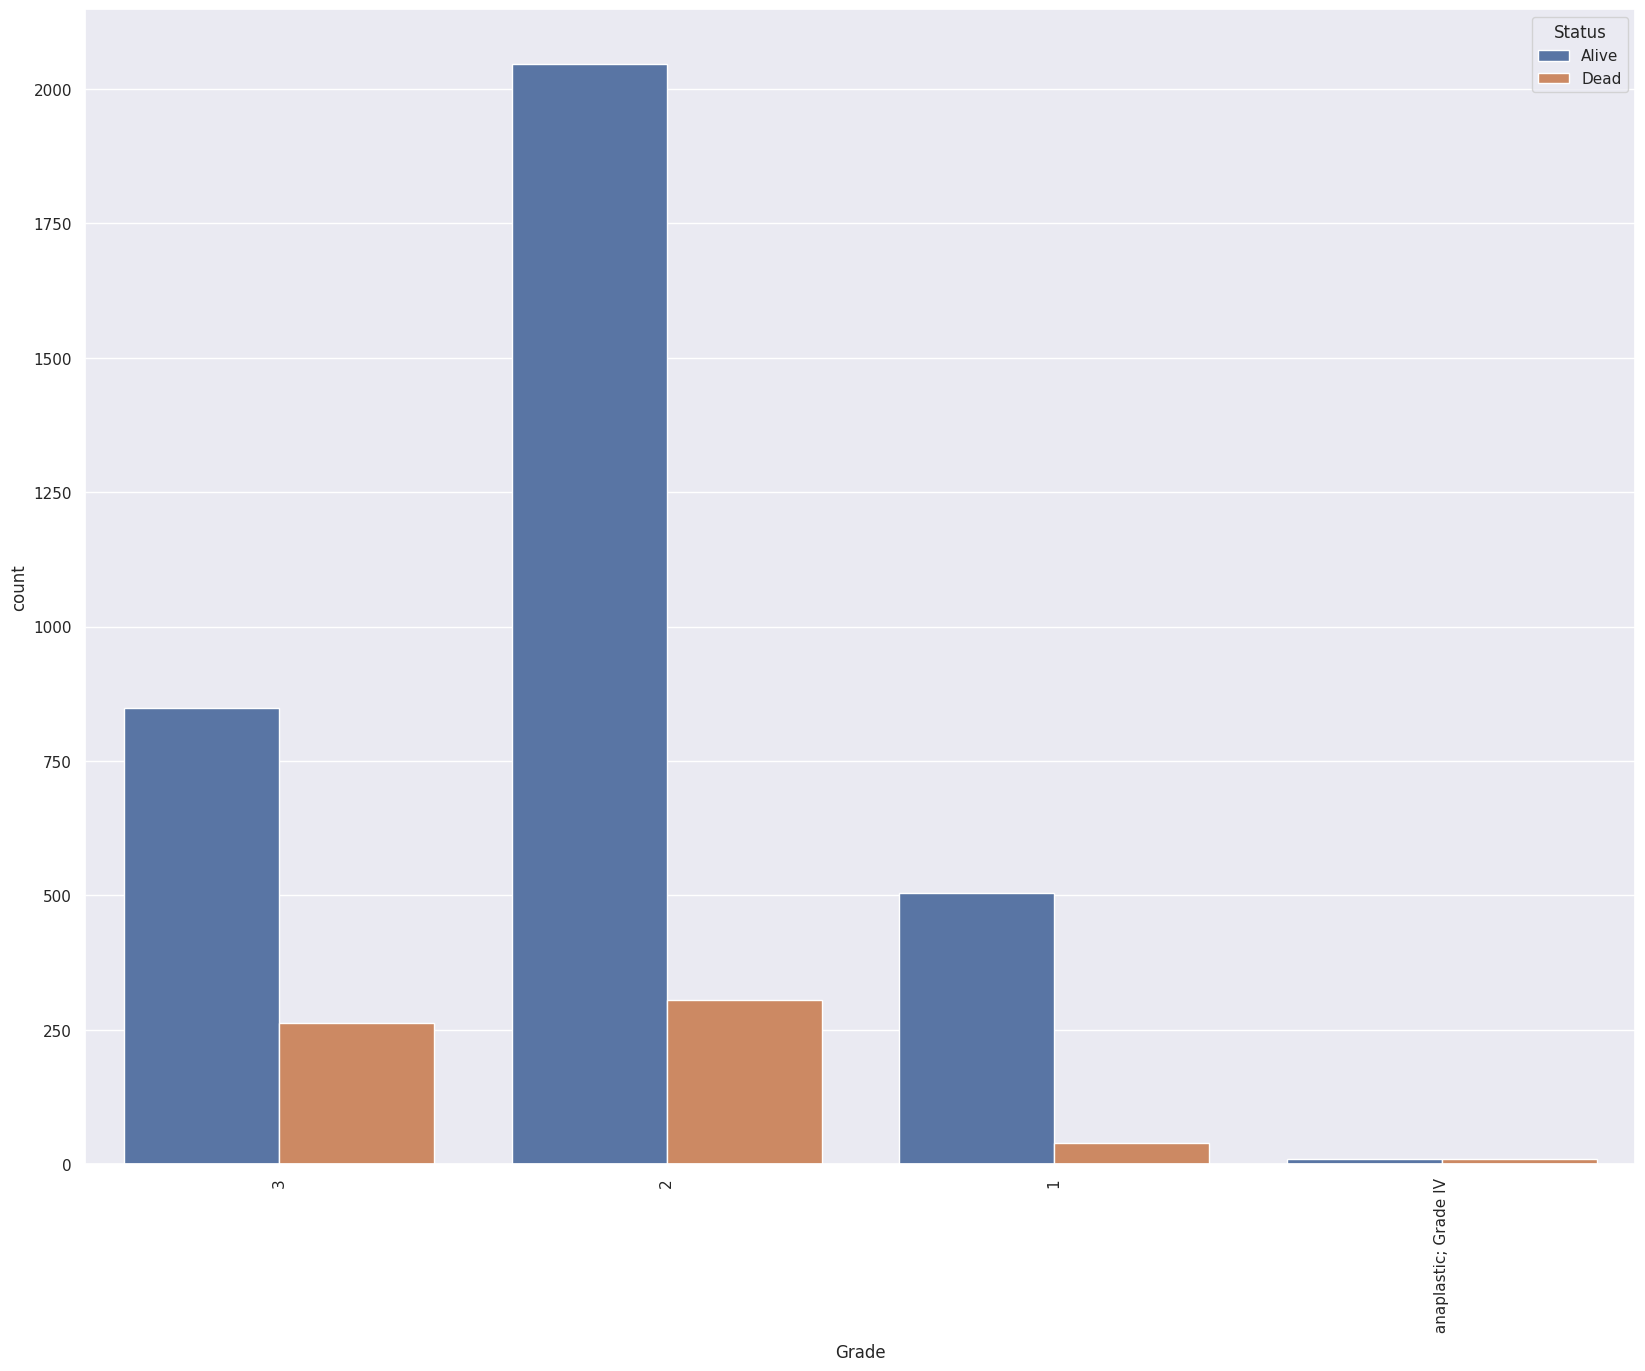

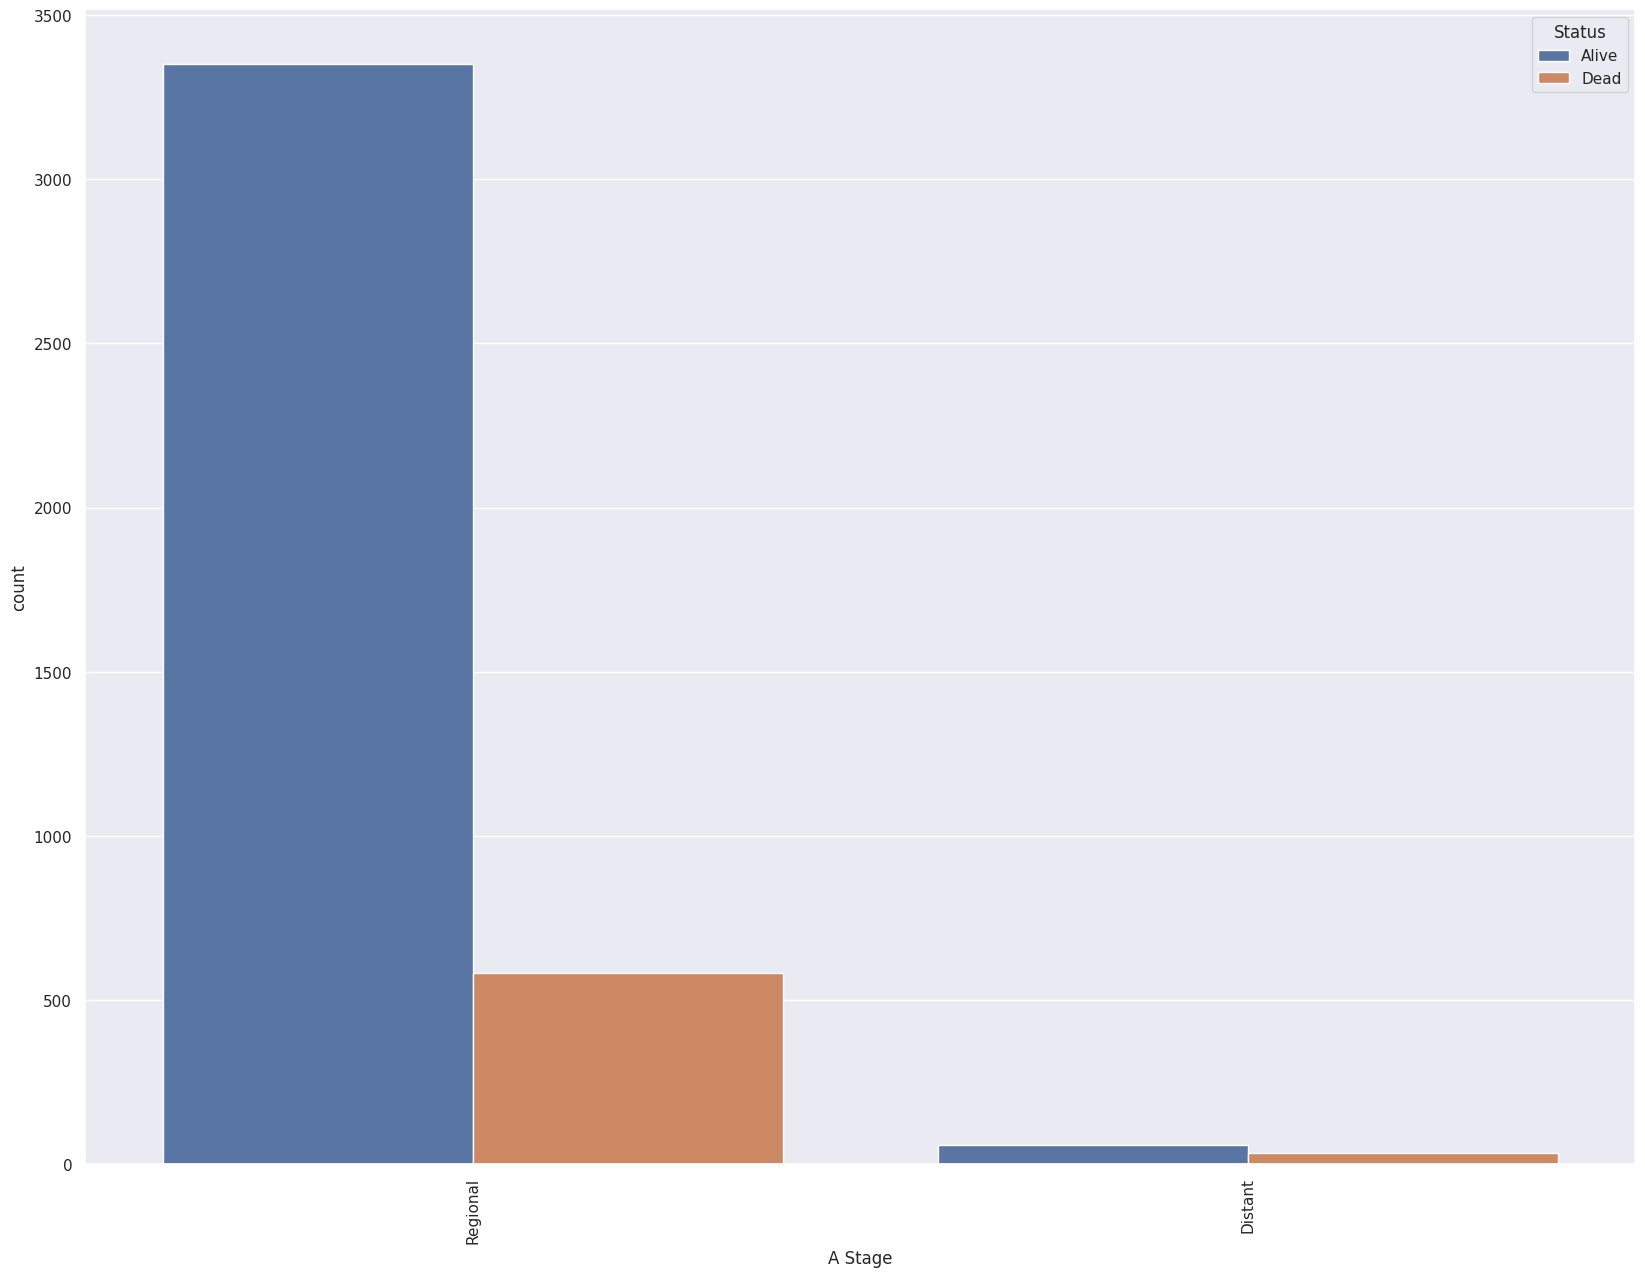

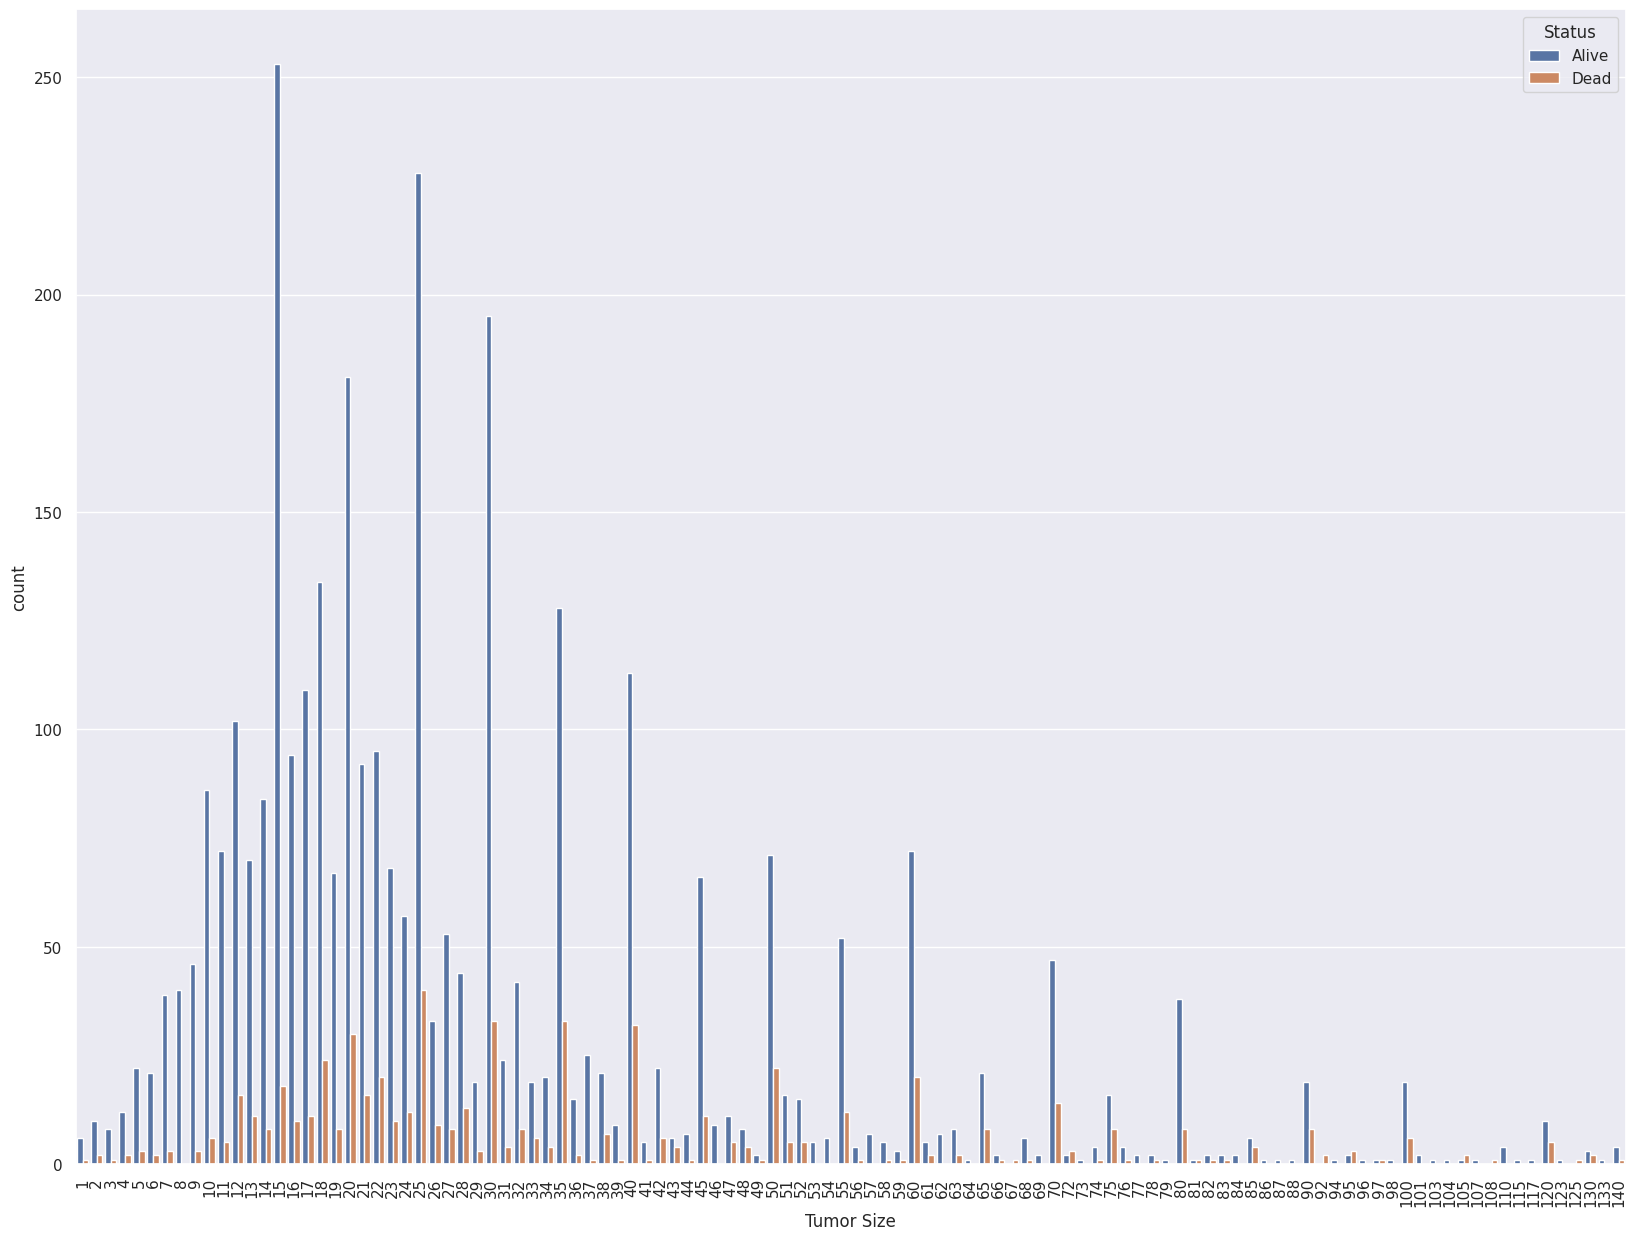

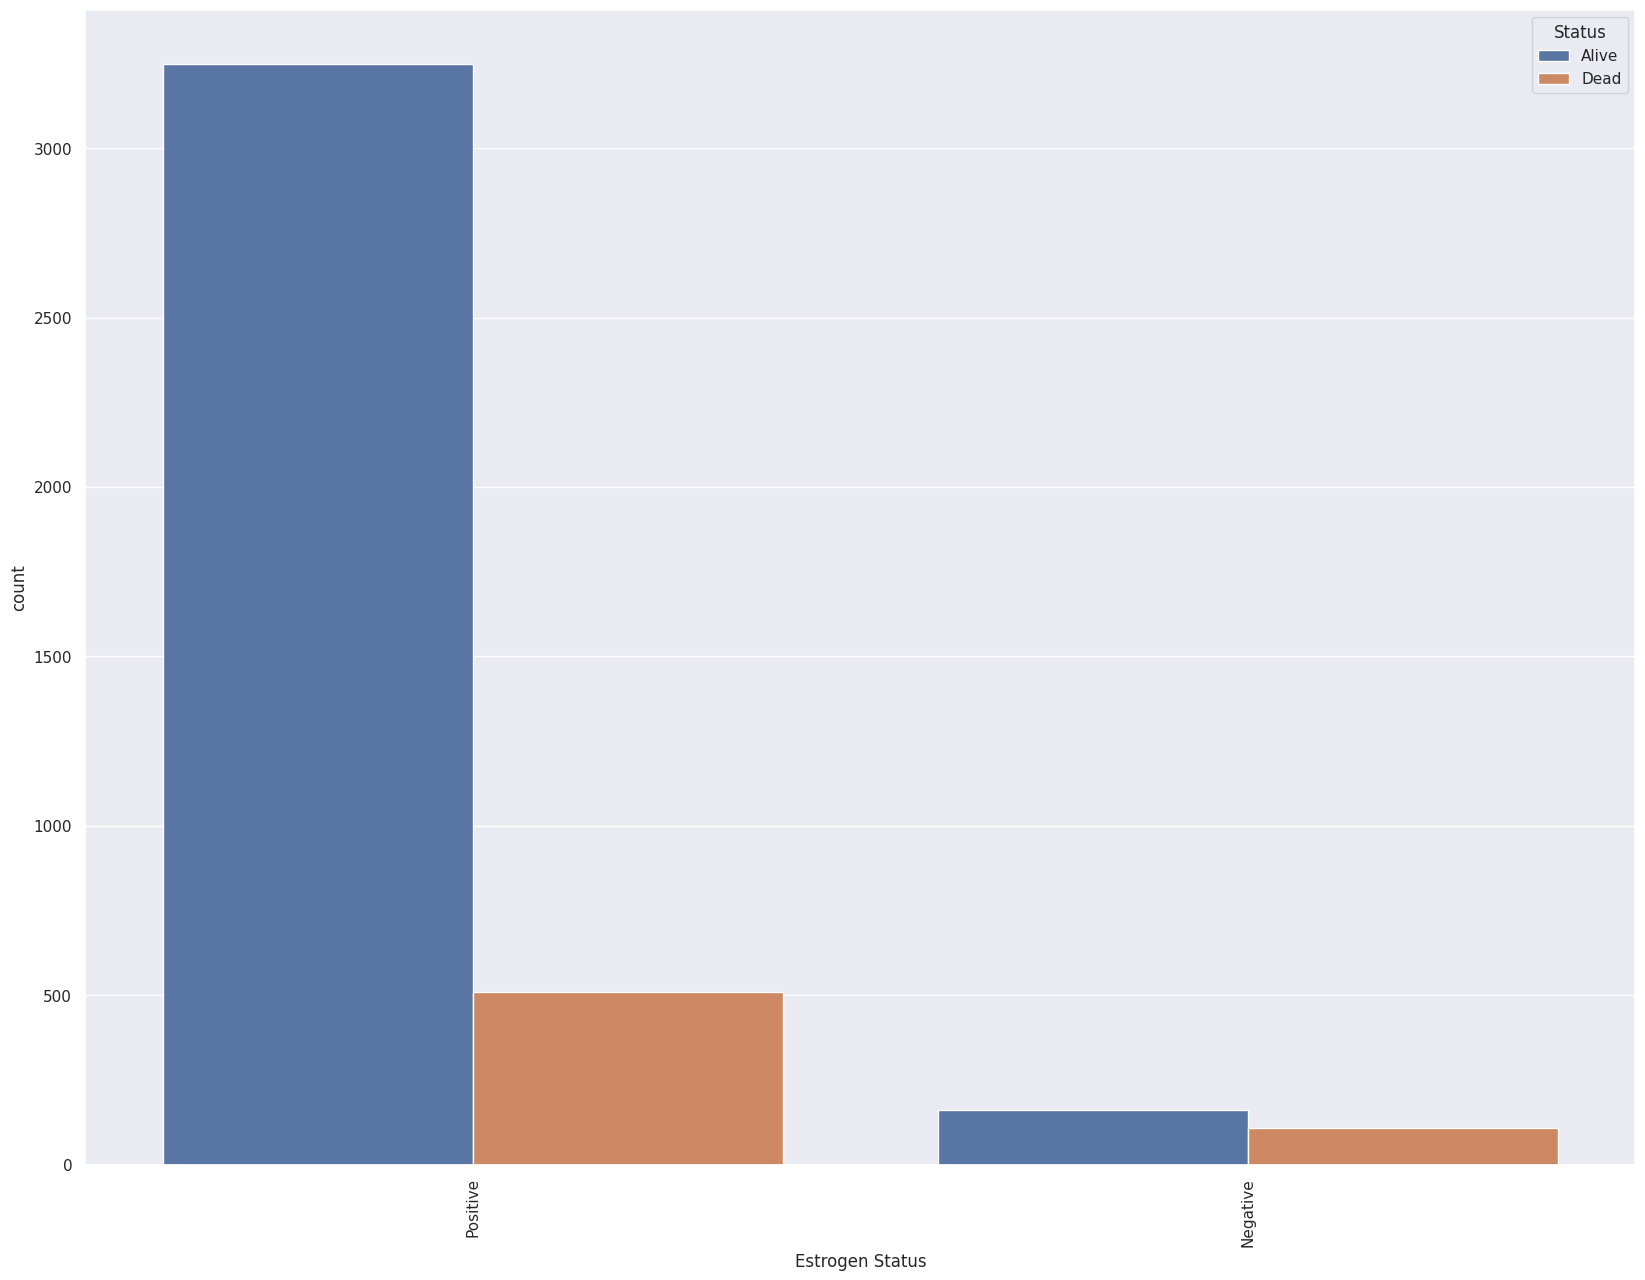

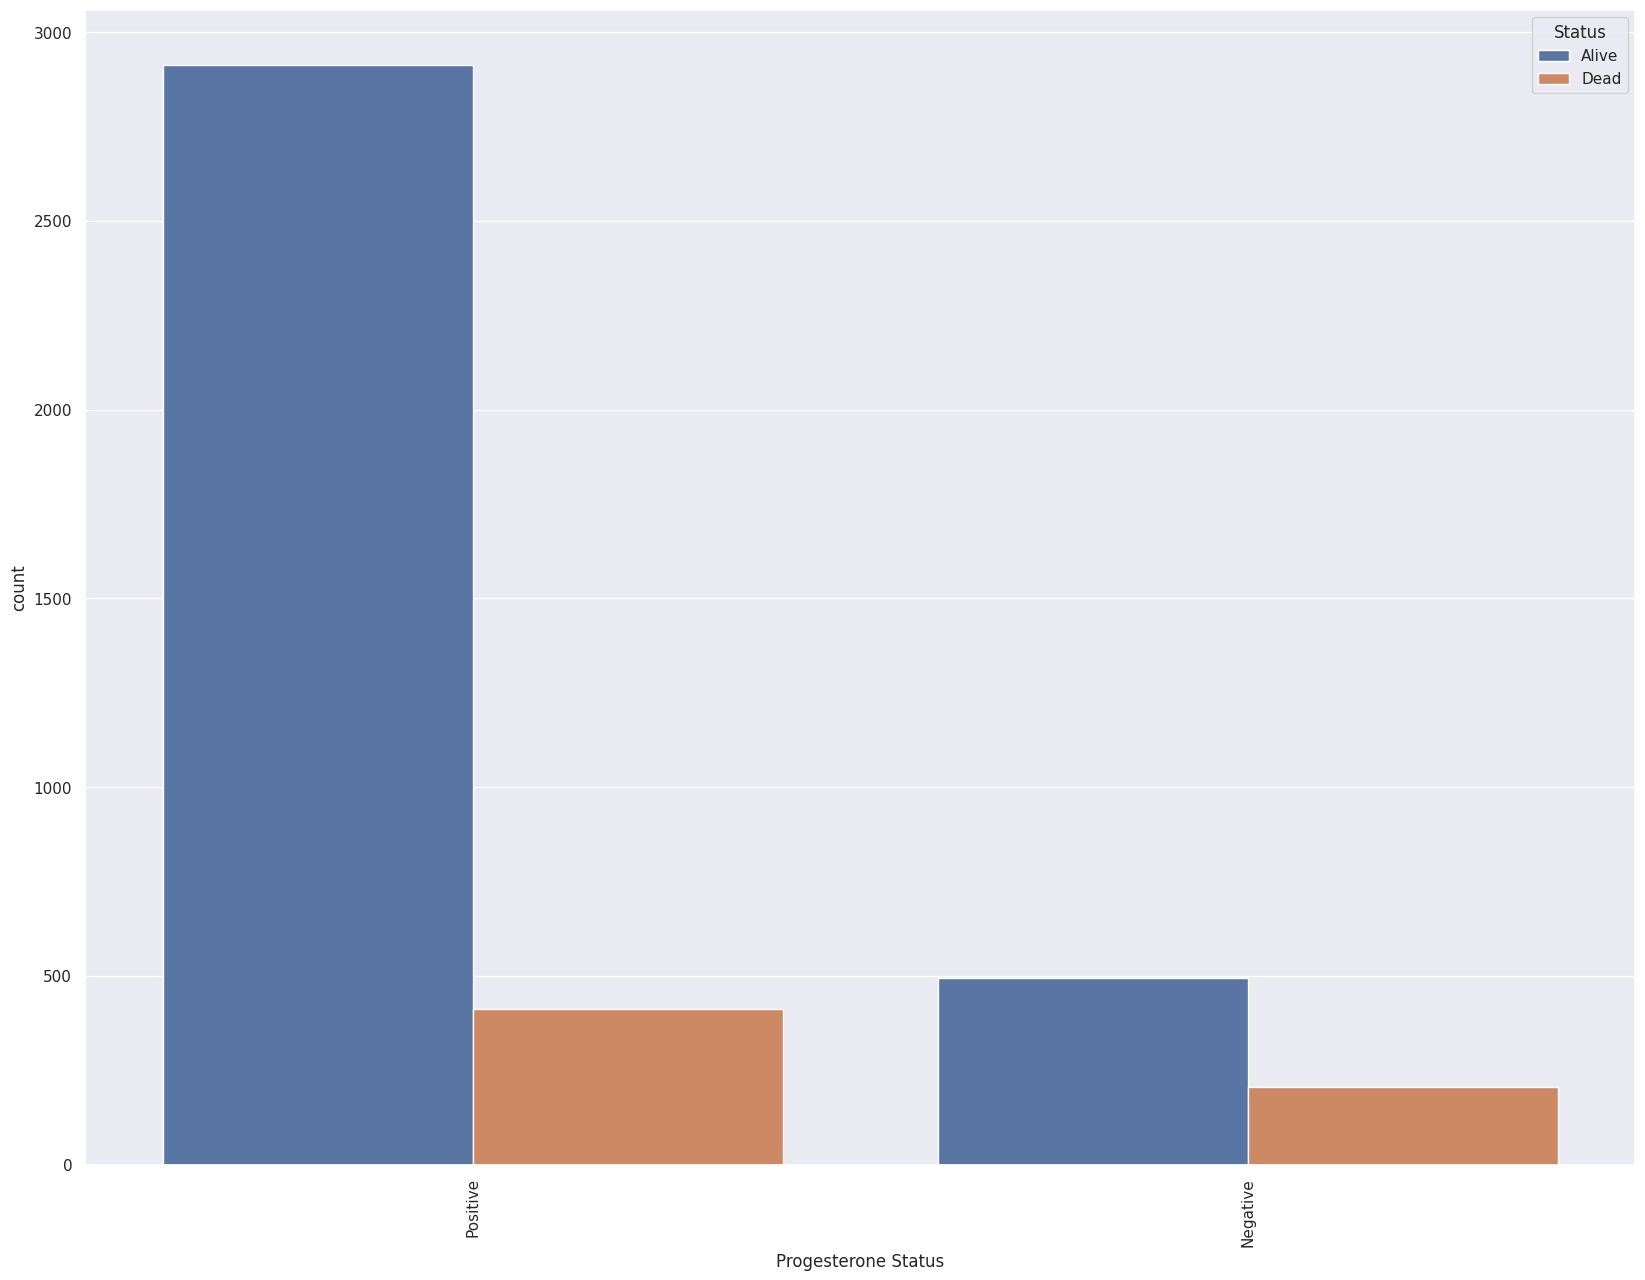

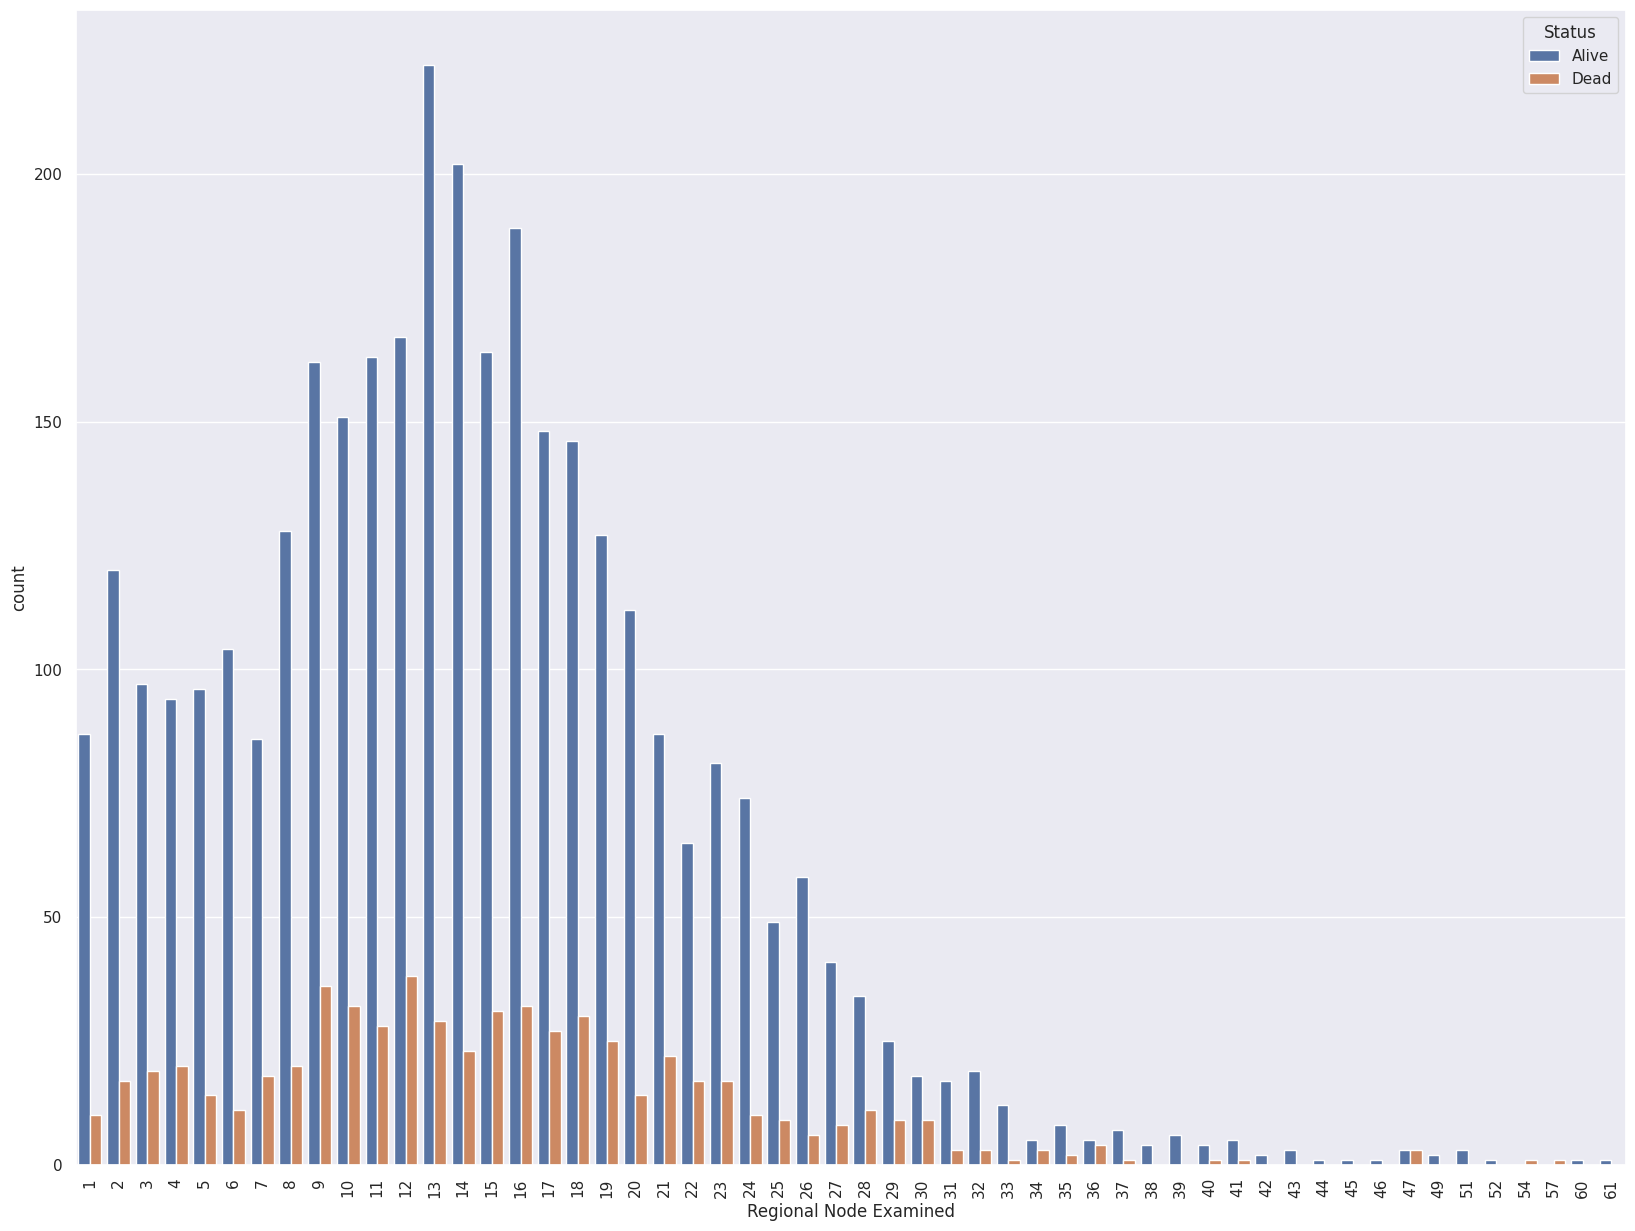

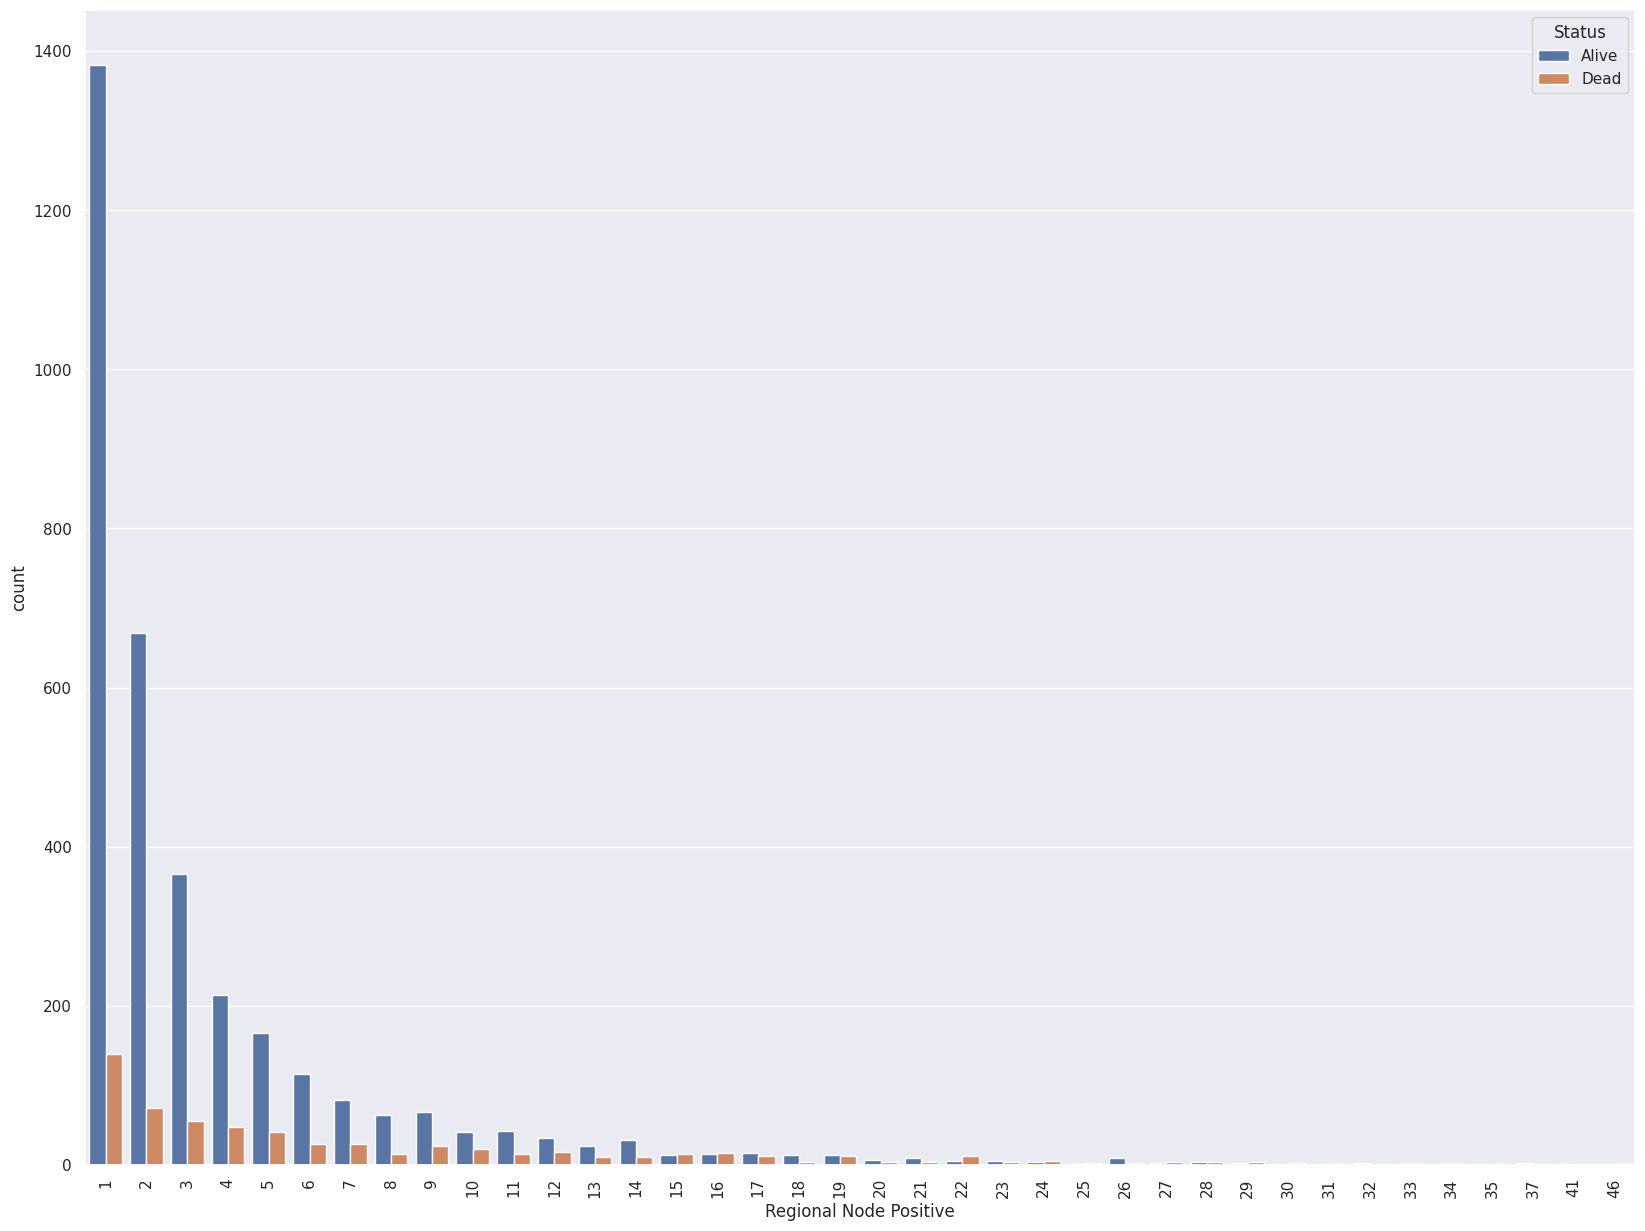

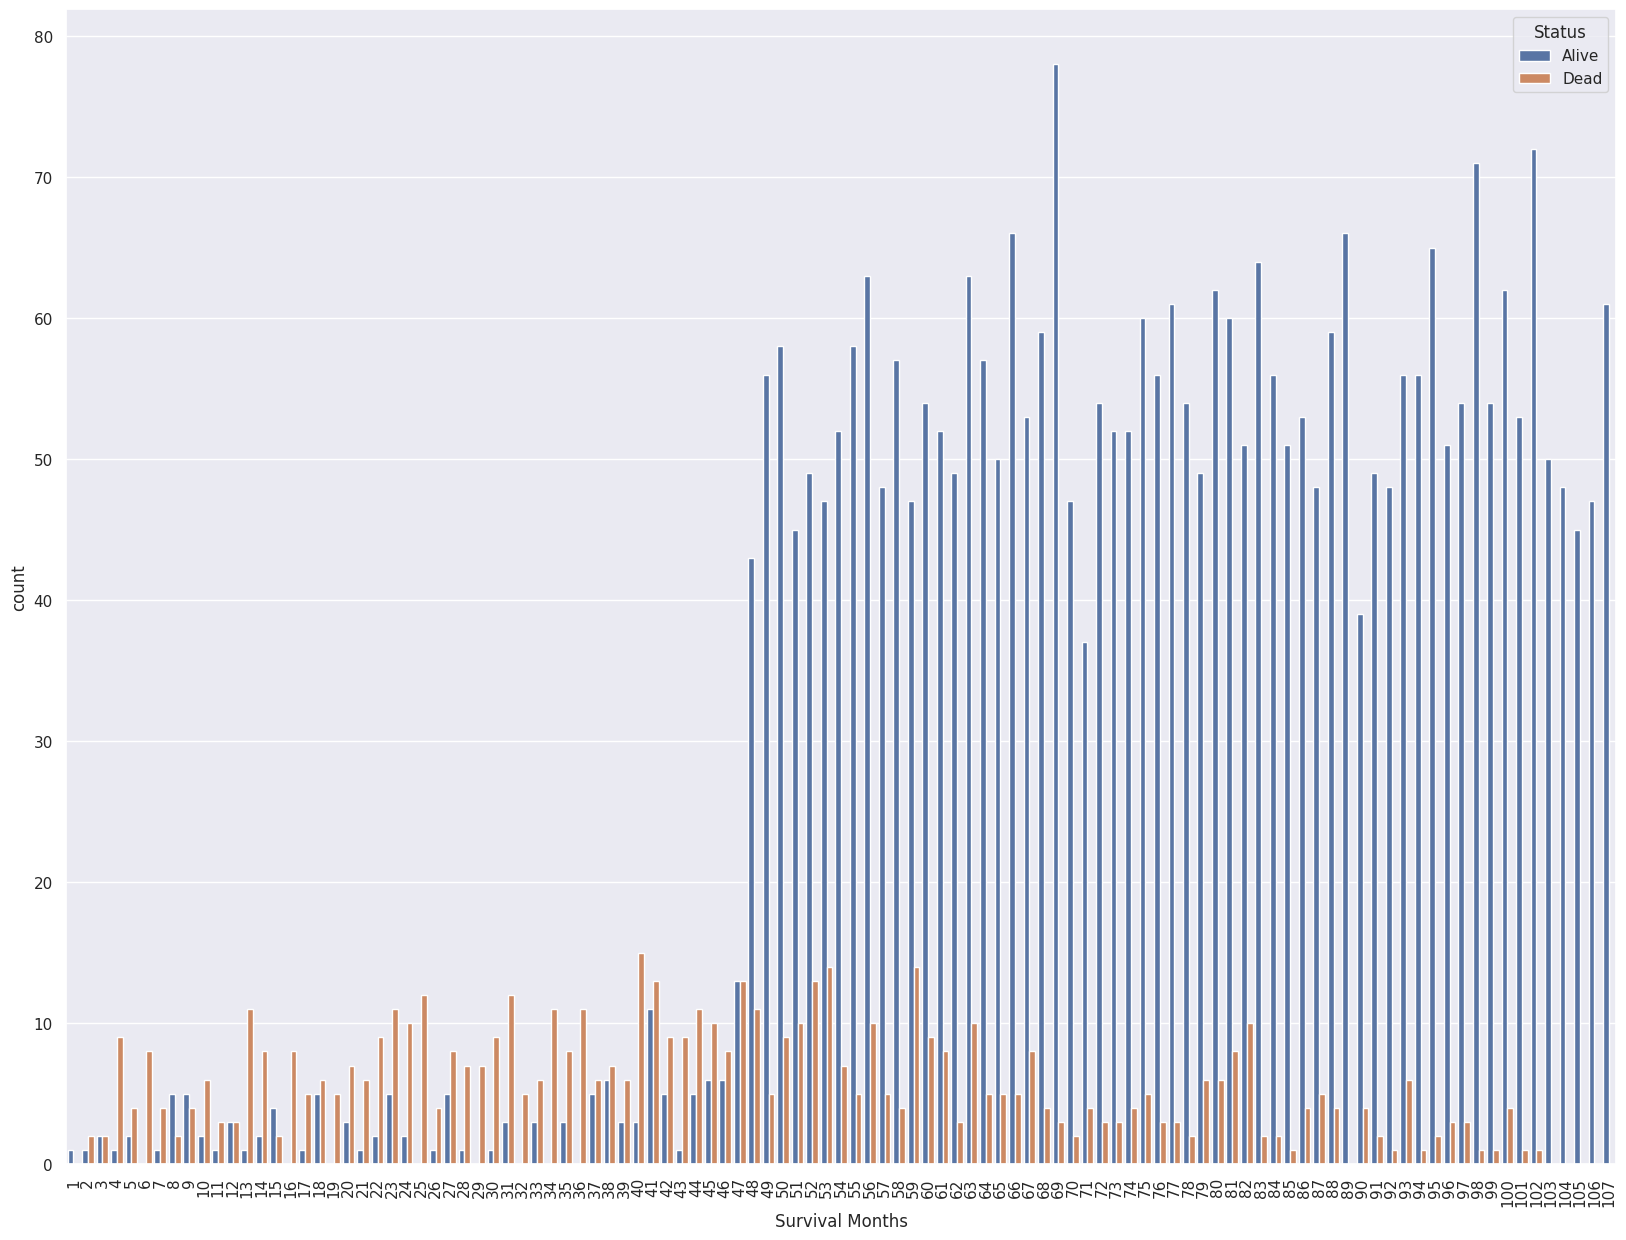

In [6]:
dfc=df.drop('Status',axis=1)
for i in dfc.columns:
    countplot (df,i)

Convert values ​​in DataFrame to numbers

In [7]:
df1=df.copy()
le=LabelEncoder()
for i in df1.columns:
    df1[i]=le.fit_transform(df1[i])
df1

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
0,38,2,1,0,0,0,1,3,1,3,1,1,23,0,59,0
1,20,2,1,1,1,2,0,2,1,34,1,1,13,4,61,0
2,28,2,0,2,2,4,0,2,1,62,1,1,13,6,74,0
3,28,2,1,0,0,0,1,3,1,17,1,1,1,0,83,0
4,17,2,1,1,0,1,1,3,1,40,1,1,2,0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4019,32,1,1,0,0,0,0,2,1,8,1,1,0,0,48,0
4020,26,2,0,1,1,2,0,2,1,45,1,1,13,7,68,0
4021,38,2,1,1,0,1,0,2,1,21,1,0,10,2,68,0
4022,28,0,0,1,0,1,0,2,1,43,1,1,10,0,71,0


Summary of data statistics

In [8]:
temp = df1.describe()
temp.style.background_gradient(cmap='Oranges')

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Regional Node Positive,Survival Months,Status
count,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000,4024.000000
mean,23.972167,1.775845,1.371272,0.784791,0.438370,1.321819,0.690358,2.131710,0.977137,29.226392,0.933151,0.826541,13.349155,3.154573,70.297962,0.153082
std,8.963134,0.564465,1.063637,0.765531,0.693479,1.266624,1.016418,0.642398,0.149485,20.207811,0.249791,0.378691,8.060677,5.084615,22.921430,0.360111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,15.000000,1.000000,1.000000,8.000000,0.000000,55.000000,0.000000
50%,24.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000,24.000000,1.000000,1.000000,13.000000,1.000000,72.000000,0.000000
75%,31.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,37.000000,1.000000,1.000000,18.000000,4.000000,89.000000,0.000000
max,39.000000,2.000000,4.000000,3.000000,2.000000,4.000000,3.000000,3.000000,1.000000,109.000000,1.000000,1.000000,53.000000,37.000000,106.000000,1.000000


Calculate correlation matrix and draw heatmap

<Axes: >

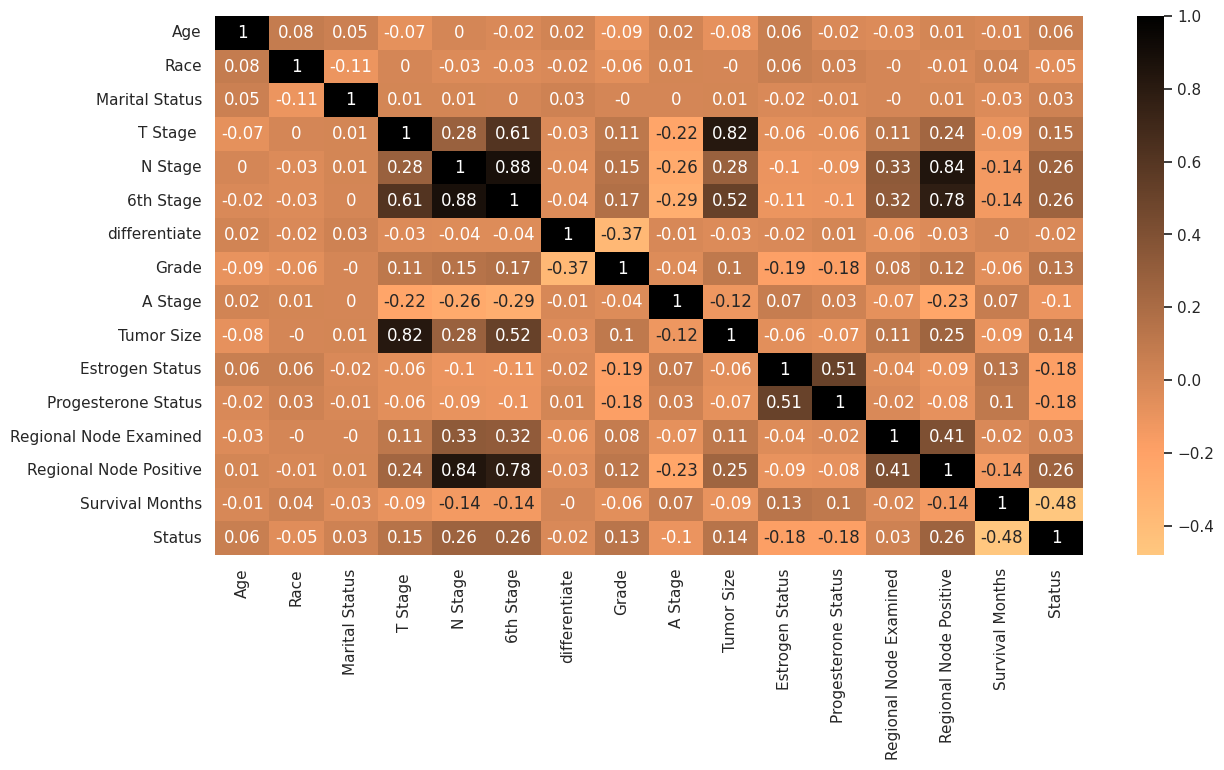

In [9]:
correlation = df1.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'copper_r')

**Preparing Data for the Machine Learning Model**

* df2 = df1.copy(): Create a copy of the encoded DataFrame.
* y = df2.pop('Status').values: Remove the 'Status' column from the DataFrame and store it in the variable y, which will be the target label for the model.
* X = df2.values: Store all remaining values in the DataFrame into the variable X, which will be the input data for the model.

In [10]:
df2=df1.copy()
y=df2.pop('Status').values
X=df2.values

**Split the data into training set and test set training set (90%) and test set (10%)**

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=1)

**Initialize Random Forest model**

In [12]:
rfmodel=RandomForestClassifier(n_estimators=600)

**Model training**

In [13]:
rfmodel.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

**Prediction on test set**

In [14]:
y_pred=rfmodel.predict(X_test)

Calculate and print out the model evaluation metrics:

* Accuracy: The ratio of correctness between prediction and actual value.
* Classification report: Provides metrics such as Precision, Recall, F1-Score for each class (Alive, Dead).

In [15]:
# Calculate indexes
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

# Store indicators into a list to draw a chart
metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

print("Accuracy:", accuracy)
print("\nClassification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9280397022332506

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       348
           1       0.91      0.53      0.67        55

    accuracy                           0.93       403
   macro avg       0.92      0.76      0.81       403
weighted avg       0.93      0.93      0.92       403



**Draw the confusion matrix**

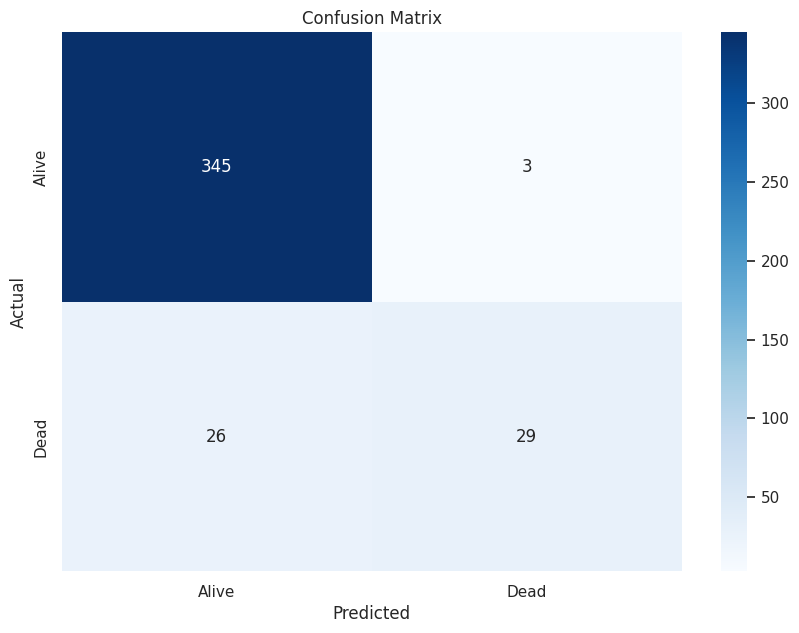

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Alive', 'Dead'], yticklabels=['Alive', 'Dead'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Chart of classification report values:

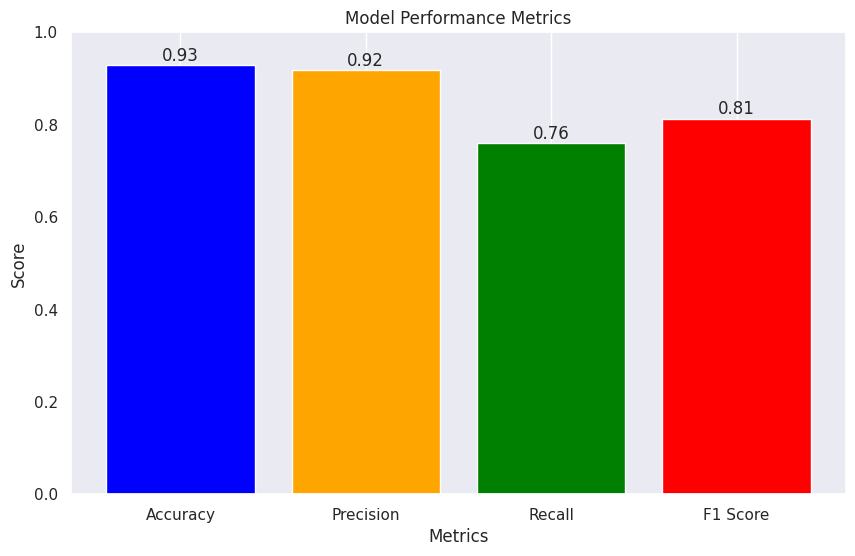

In [17]:
# Draw a chart
plt.figure(figsize=(10, 6))
plt.bar(labels, metrics, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)  # Limit the y axis from 0 to 1
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.xlabel('Metrics')
plt.grid(axis='y')

# Show values ​​on bars
for i, v in enumerate(metrics):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.show()

**Data Analysis Process and Building a Machine Learning Model to Predict Breast Cancer Status Based on a Dataset. The main steps include:**

* Importing the necessary libraries.
* Reading the data from a CSV file and checking basic information about the data.
* Plotting charts to visualize the data.
* Converting categorical values into numbers.
* Summarizing the data statistics and calculating the correlation matrix.
* Preparing the data for the machine learning model, splitting the data into training and testing sets.
* Training the Random Forest model and making predictions on the test set.
* Evaluating the model using metrics such as accuracy, recall, F1 score, and plotting the confusion matrix.